# World Happiness Report Data Analysis Using Python

# objective

##### World Happiness Report 2021 Data Analysis using Python help to learn how to analyze real world data using Python libraries. In this Data Analysis project, we will perform exploratory data analysis and answer specific questions with Happiness data 2021 from the United Nations. we will visualize data and see how happiness of a country is related to factors such as GDP, Social Support, Corruption, Life Expectancy, etc.

# 01. Importing python Library

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 02.Set General style of the plot

In [8]:
sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(10,7)
plt.rcParams['figure.facecolor']='lightblue'

# 03. load Dataset using Pandas

In [9]:
data=pd.read_csv('world-happiness-report-2021.csv')
data.head()

,Country name,Regional indicator,Happiness Score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [ ]:
data_columns=['Country name','Regional indicator','Happiness Score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']

data = data[data_columns].copy()


# Rename column name

In [7]:
happy_df=data.rename({'Country name':'country_name','Regional indicator':'regional_indicator','Happiness Score':'happiness_score','Logged GDP per capita':'logged_GDP_per_capita','Social support':'social_support','Healthy life expectancy':'healthy_life_expectancy','Freedom to make life choices':'freedom_to_make_life_choices','Generosity':'generosity','Perceptions of corruption':'perception_of_corruption'},axis=1)

happy_df.head(5)

# Checking null values in different columns

In [9]:
happy_df.isnull().sum()

country_name                    0
regional_indicator              0
happiness_score                 0
logged_GDP_per_capita           0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perception_of_corruption        0
dtype: int64

# Creating scatter plot using seaborn

Text(0, 0.5, 'GDP per capita')

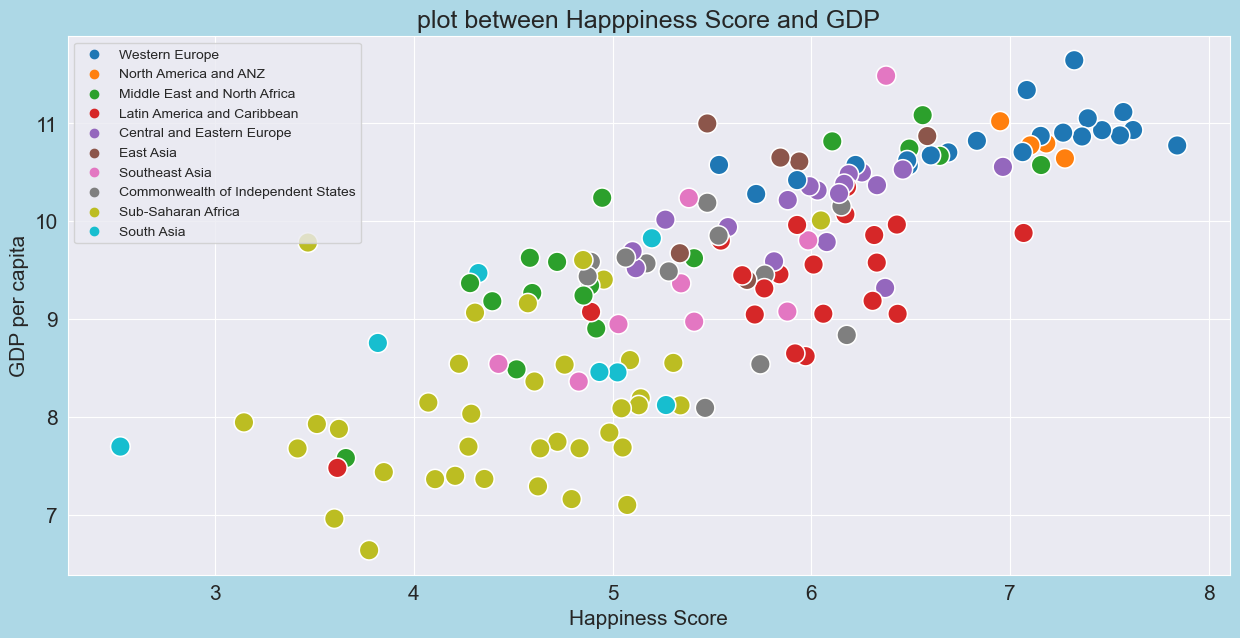

In [10]:
#plot b/w happiness and GDP

plt.rcParams['figure.figsize']=(15,7)
plt.title('plot between Happpiness Score and GDP')
sns.scatterplot(x= happy_df.happiness_score, y=happy_df.logged_GDP_per_capita, hue=happy_df.regional_indicator, s=200);

plt.legend(loc='upper left', fontsize ='10')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')

# Calculating the sum of regional GDP using groupby method

In [11]:
gdp_region= happy_df.groupby('regional_indicator')['logged_GDP_per_capita'].sum()
gdp_region

regional_indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: logged_GDP_per_capita, dtype: float64

# Plot GDP by Region using pie chart

Text(0, 0.5, '')

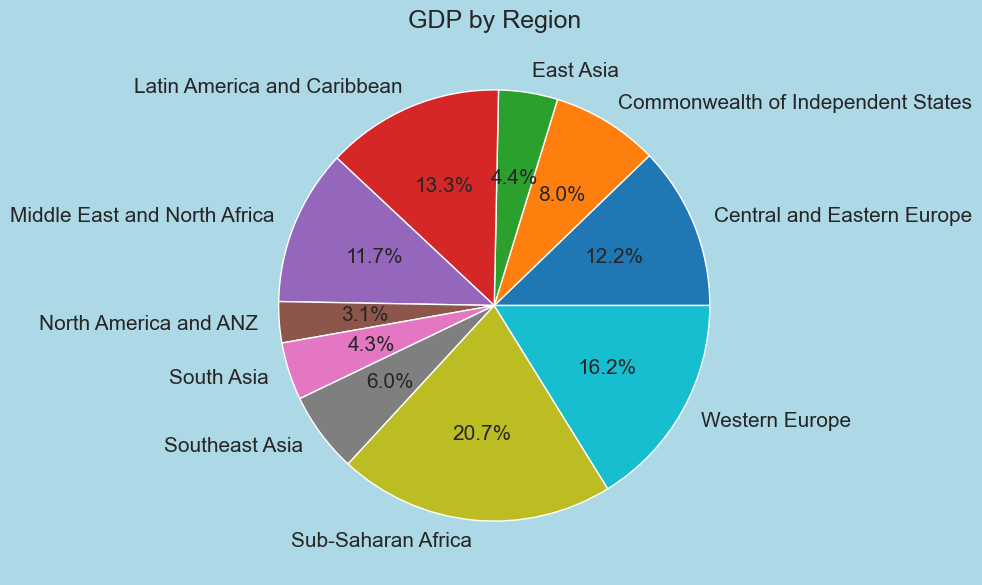

In [12]:
gdp_region.plot.pie(autopct='%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')

In [13]:
# Total countries
total_country= happy_df.groupby('regional_indicator')[['country_name']].count()
print(total_country)

                                    country_name
regional_indicator                              
Central and Eastern Europe                    17
Commonwealth of Independent States            12
East Asia                                      6
Latin America and Caribbean                   20
Middle East and North Africa                  17
North America and ANZ                          4
South Asia                                     7
Southeast Asia                                 9
Sub-Saharan Africa                            36
Western Europe                                21


# Correlation map using seaborn heatmap method

<Axes: >

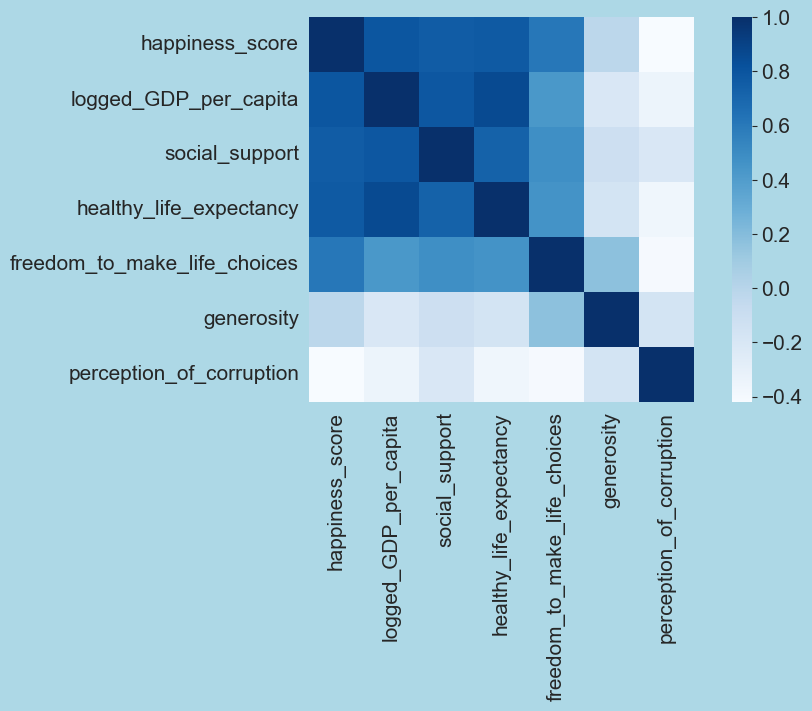

In [14]:
# Correlation Map
#Pearson correlation Method

cor = happy_df.corr(method="pearson", numeric_only=True)
f, ax = plt.subplots(figsize =(10,5))
sns.heatmap(cor, mask = np.zeros_like(cor, dtype=bool),
           cmap="Blues", square=True, ax=ax)


# Corruption in regions

In [15]:
# corruption in regions 
corruption =happy_df.groupby('regional_indicator')[['perception_of_corruption']].mean()
corruption

,perception_of_corruption
regional_indicator,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


# Bar plot Corruption in various Regions

<BarContainer object of 10 artists>

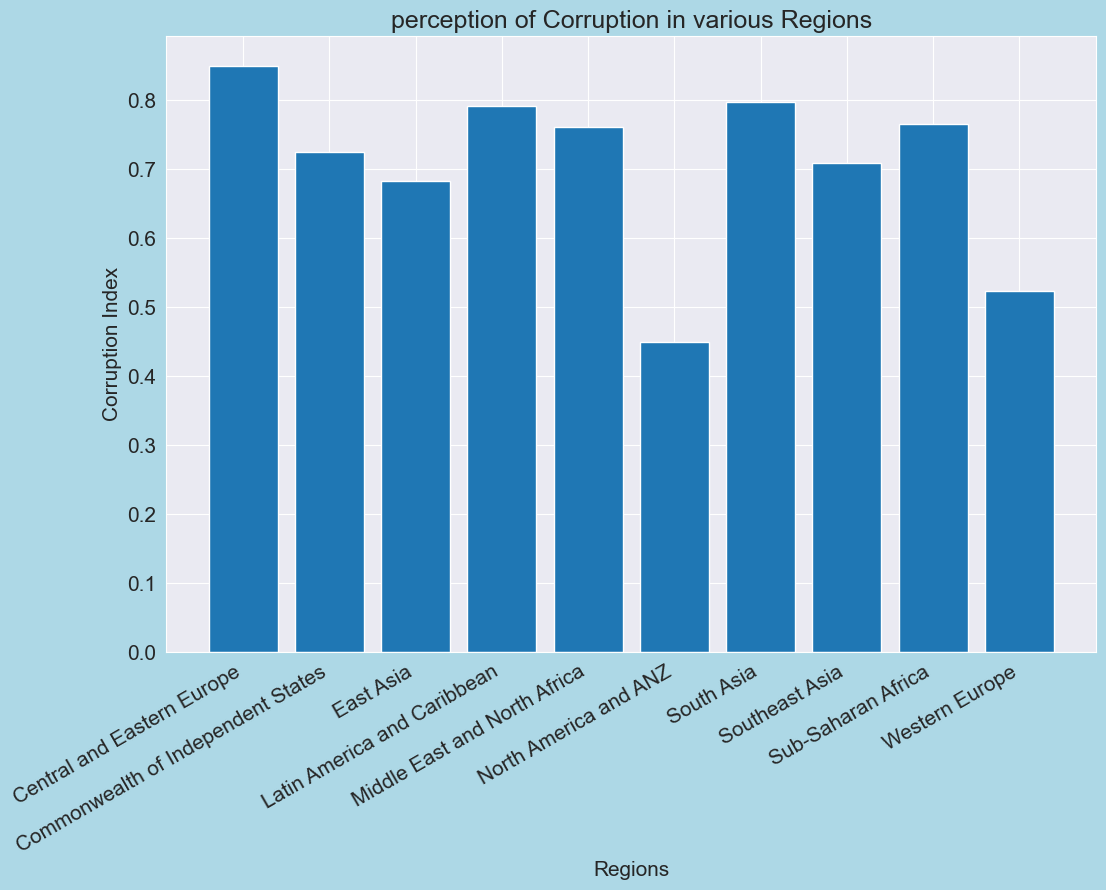

In [16]:
plt.rcParams['figure.figsize']=(12,8)
plt.title('perception of Corruption in various Regions')
plt.xlabel('Regions',fontsize=15)
plt.ylabel('Corruption Index', fontsize=15)
plt.xticks(rotation = 30, ha='right')
plt.bar(corruption.index, corruption.perception_of_corruption)


# Life expectancy of Top 10 and bottom 10 happiest countries

In [17]:
top_10= happy_df.head(10)
bottom_10 = happy_df.tail(10)

Text(832.0858585858584, 0.5, 'Life expectancy')

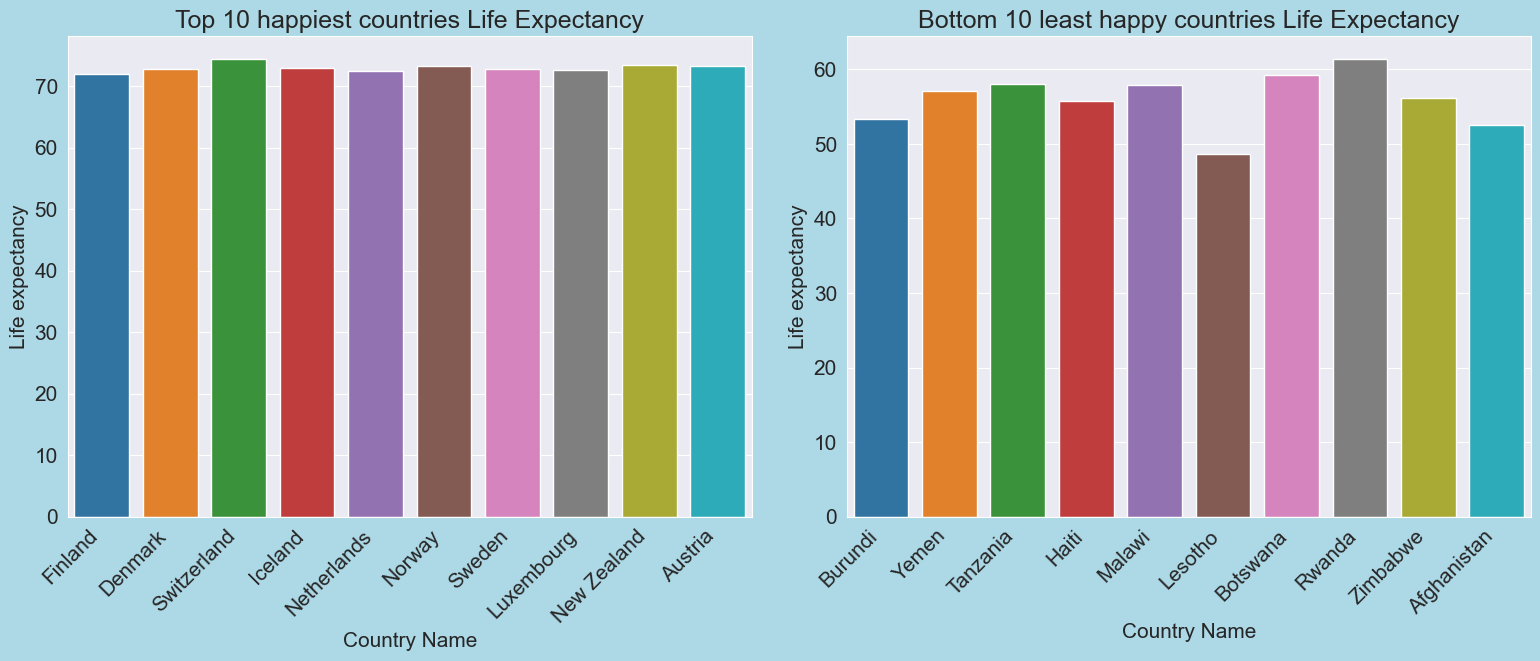

In [18]:
fig, axes= plt.subplots(1,2, figsize=(16,6))
plt.tight_layout(pad=2)
xlabels= top_10.country_name
axes[0].set_title('Top 10 happiest countries Life Expectancy')
axes[0].set_xticks(range(len(xlabels))) 
axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x=top_10.country_name, y=top_10.healthy_life_expectancy, ax=axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life expectancy')

xlabels= bottom_10.country_name
axes[1].set_title('Bottom 10 least happy countries Life Expectancy')
axes[1].set_xticks(range(len(xlabels))) 
axes[1].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x=bottom_10.country_name, y=bottom_10.healthy_life_expectancy,ax= axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life expectancy')


# Plot between Freedom to make life choices and Happiness Score

Text(0, 0.5, 'Happiness Score')

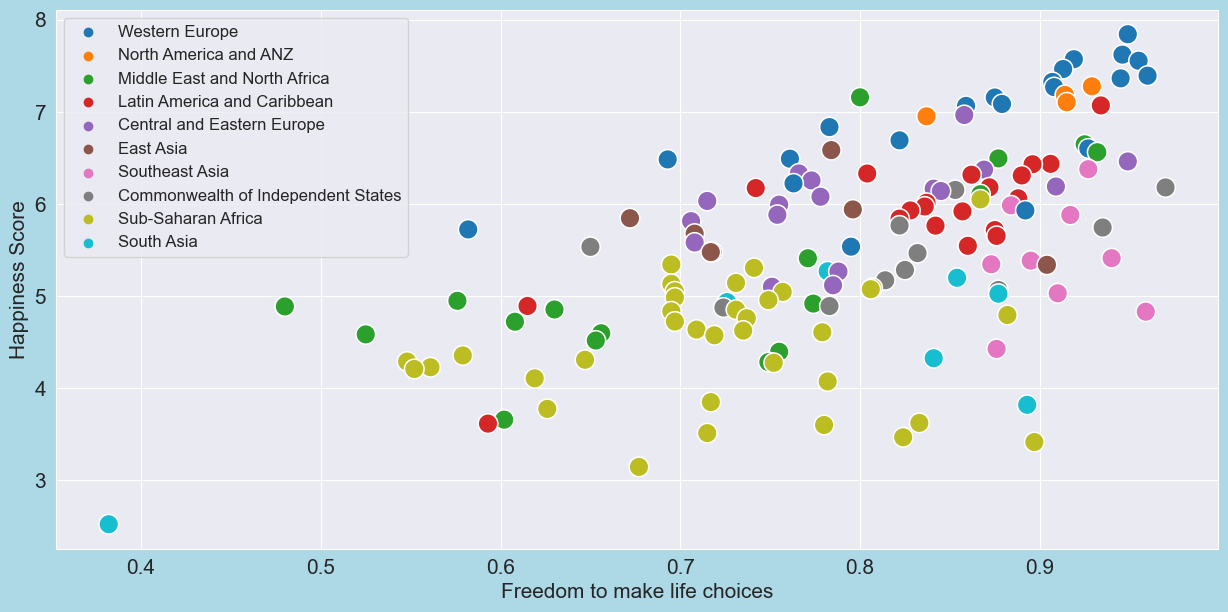

In [19]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x= happy_df.freedom_to_make_life_choices, y=happy_df.happiness_score,hue =happy_df.regional_indicator,s=200)
plt.legend(loc='upper left', fontsize='12')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')

# Top 10 most corrupt countries

<BarContainer object of 10 artists>

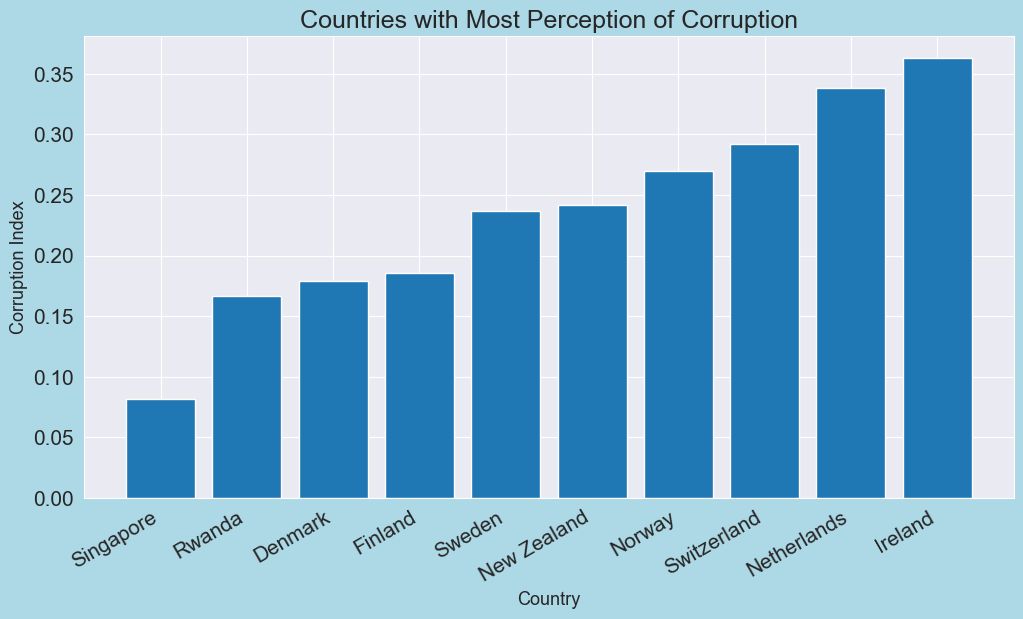

In [20]:
country = happy_df.sort_values(by='perception_of_corruption').head(10)
plt.rcParams['figure.figsize']=(12,6)
plt.title('Countries with Most Perception of Corruption')
plt.xlabel('Country',fontsize=13)
plt.ylabel('Corruption Index',fontsize=13)
plt.xticks(rotation=30,ha='right')
plt.bar(country.country_name,country.perception_of_corruption)

# Scatter plot of Corruption vs Happiness

Text(0, 0.5, 'Corruption')

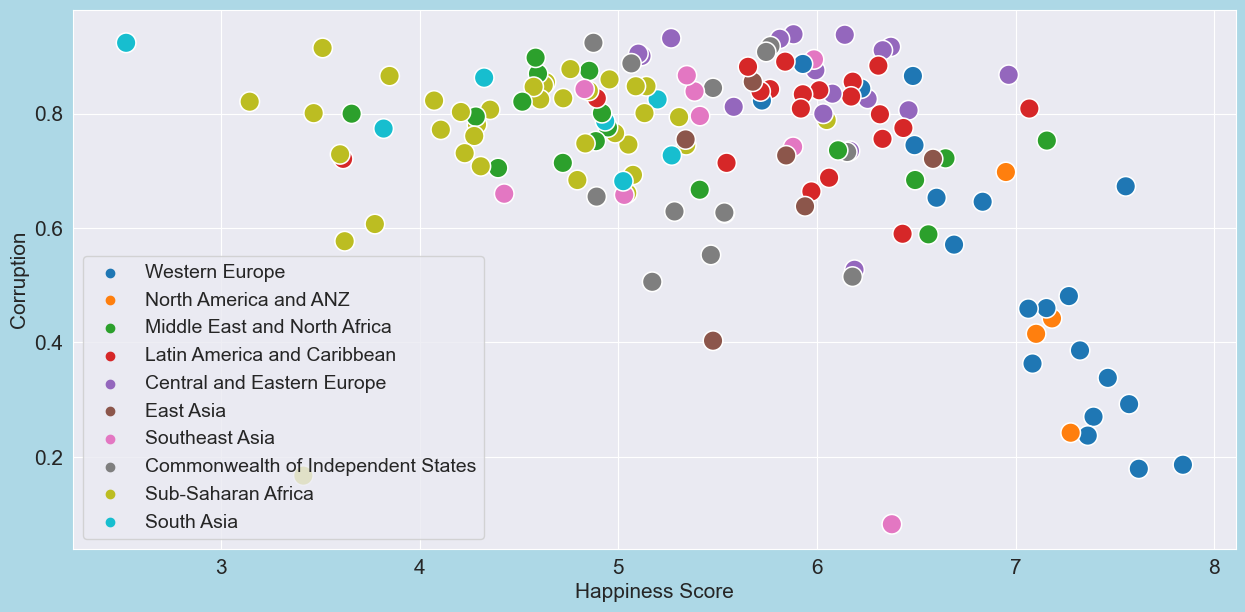

In [21]:
# corruption vs happiness
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x= happy_df.happiness_score, y=happy_df.perception_of_corruption,hue=happy_df.regional_indicator, s=200)
plt.legend(loc='lower left',fontsize=14)
plt.xlabel('Happiness Score')
plt.ylabel('Corruption')

# conclusion

 #### this World Happiness Report project provided valuable insights into the factors shaping happiness levels around the world. By leveraging Python's data analysis capabilities, we gained a deeper understanding of the data and the relationships between different variables. This project serves as a foundation for further research and interventions aimed at promoting happiness and well-being on a global scale.